# Importing required Libraries

In [1]:
#importinf required library

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# Reading the data

In [2]:
#reading the data
df = pd.read_csv('day.csv')

# Understanding the data

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.instant.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
df.season.unique()

array([1, 2, 3, 4])

In [9]:
df.dteday.unique()

array(['01-01-2018', '02-01-2018', '03-01-2018', '04-01-2018',
       '05-01-2018', '06-01-2018', '07-01-2018', '08-01-2018',
       '09-01-2018', '10-01-2018', '11-01-2018', '12-01-2018',
       '13-01-2018', '14-01-2018', '15-01-2018', '16-01-2018',
       '17-01-2018', '18-01-2018', '19-01-2018', '20-01-2018',
       '21-01-2018', '22-01-2018', '23-01-2018', '24-01-2018',
       '25-01-2018', '26-01-2018', '27-01-2018', '28-01-2018',
       '29-01-2018', '30-01-2018', '31-01-2018', '01-02-2018',
       '02-02-2018', '03-02-2018', '04-02-2018', '05-02-2018',
       '06-02-2018', '07-02-2018', '08-02-2018', '09-02-2018',
       '10-02-2018', '11-02-2018', '12-02-2018', '13-02-2018',
       '14-02-2018', '15-02-2018', '16-02-2018', '17-02-2018',
       '18-02-2018', '19-02-2018', '20-02-2018', '21-02-2018',
       '22-02-2018', '23-02-2018', '24-02-2018', '25-02-2018',
       '26-02-2018', '27-02-2018', '28-02-2018', '01-03-2018',
       '02-03-2018', '03-03-2018', '04-03-2018', '05-03

In [10]:
df.yr.unique()

array([0, 1])

In [11]:
df.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
df.holiday.unique()

array([0, 1])

In [13]:
df.weekday.unique()

array([1, 2, 3, 4, 5, 6, 0])

In [14]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
df.workingday.unique()

array([1, 0])

In [16]:
df.weathersit.unique()

array([2, 1, 3])

In [17]:
df.temp.unique()

array([14.110847 , 14.902598 ,  8.050924 ,  8.2      ,  9.305237 ,
        8.378268 ,  8.057402 ,  6.765    ,  5.671653 ,  6.184153 ,
        6.932731 ,  7.081807 ,  6.59567  ,  9.566653 ,  9.498347 ,
        7.209153 ,  8.883347 , 11.979134 , 10.728347 ,  7.2775   ,
        2.4243464,  3.9573897,  3.9930433,  9.162598 ,  8.9175   ,
        7.995    ,  8.342598 ,  8.877402 ,  7.414153 ,  7.879134 ,
       10.66     ,  7.665237 ,  8.663464 , 11.719153 , 11.138347 ,
        9.054153 ,  5.526103 ,  5.918268 ,  7.752731 ,  9.1225   ,
       12.977402 , 17.015    , 10.909567 , 13.048701 , 17.869153 ,
       21.388347 , 16.365847 , 11.693897 , 12.436653 ,  7.471102 ,
        9.091299 , 12.121732 , 14.938268 , 11.5825   , 14.082598 ,
       16.698193 , 10.933347 , 13.735    ,  8.131653 , 15.750847 ,
       15.437402 , 10.731299 , 11.9925   , 12.129153 , 15.952731 ,
       13.495847 , 15.758268 , 13.333897 , 13.013031 , 14.973897 ,
       22.14     , 19.3725   , 13.6325   , 17.647835 , 18.1083

In [18]:
df.atemp.unique()

array([18.18125 , 17.68695 ,  9.47025 , 10.6061  , 11.4635  , 11.66045 ,
       10.44195 ,  8.1127  ,  5.80875 ,  7.5444  ,  9.5732  ,  8.02365 ,
        7.54415 ,  9.42065 , 12.4056  , 11.71085 ,  8.83855 , 11.61665 ,
       14.9211  , 12.7525  ,  7.89165 ,  3.95348 ,  4.941955,  5.8965  ,
       11.7263  , 10.18    , 10.985   , 11.16585 , 10.6063  , 12.5161  ,
        9.3125  , 11.7265  , 12.72085 ,  8.8939  , 11.42935 , 12.1529  ,
       14.58355 , 15.1829  ,  9.9123  ,  7.21415 ,  7.4774  , 10.67545 ,
       11.6477  , 16.20565 , 19.9175  , 12.7137  , 15.81    , 21.4329  ,
       25.59915 , 19.5702  , 13.8665  , 14.20375 ,  9.30165 , 12.28585 ,
       14.45955 , 17.52305 , 14.1096  , 17.55545 , 20.0059  , 13.19395 ,
       16.00355 , 10.00665 , 12.78395 , 18.93895 , 18.3126  , 11.92305 ,
       15.12    , 14.3304  , 19.2834  , 15.25    , 16.2875  , 19.00455 ,
       16.6     , 15.9089  , 18.3465  , 20.51665 , 26.35045 , 23.32625 ,
       20.48675 , 22.0321  , 16.89695 , 13.54165 , 

In [19]:
df.hum.unique()

array([80.5833, 69.6087, 43.7273, 59.0435, 43.6957, 51.8261, 49.8696,
       53.5833, 43.4167, 48.2917, 68.6364, 59.9545, 47.0417, 53.7826,
       49.875 , 48.375 , 53.75  , 86.1667, 74.1739, 53.8333, 45.7083,
       40.    , 43.6522, 49.1739, 61.6957, 86.25  , 68.75  , 79.3043,
       65.1739, 72.2174, 60.375 , 82.9565, 77.5417, 43.7826, 58.5217,
       92.9167, 56.8333, 73.8333, 53.7917, 49.4783, 43.7391, 50.6364,
       54.4167, 45.7391, 37.5833, 31.4348, 42.3478, 50.5   , 51.6667,
       18.7917, 40.7826, 60.5   , 57.7778, 42.3043, 69.7391, 71.2174,
       68.    , 87.6364, 53.5   , 44.9583, 31.8333, 61.0417, 78.9167,
       94.8261, 55.1304, 42.0833,  0.    , 64.9565, 59.4583, 52.7391,
       49.6957, 65.5652, 77.6522, 60.2917, 52.5217, 37.9167, 47.375 ,
       73.7391, 62.4583, 83.9565, 49.5   , 39.4167, 49.3913, 30.2174,
       31.4167, 64.6667, 91.8333, 68.625 , 65.375 , 48.    , 42.625 ,
       64.2083, 47.0833, 83.625 , 87.75  , 85.75  , 71.6956, 73.9167,
       81.9167, 54.0

In [20]:
df.windspeed.unique()

array([10.749882 , 16.652113 , 16.636703 , 10.739832 , 12.5223   ,
        6.0008684, 11.304642 , 17.875868 , 24.25065  , 14.958889 ,
        8.182844 , 20.410009 , 20.167    ,  8.478716 , 10.583521 ,
       12.625011 , 12.999139 ,  9.833925 , 13.957239 , 13.125568 ,
       23.667214 , 11.52199  , 16.5222   , 10.60811  ,  8.696332 ,
       19.68795  ,  7.627079 ,  8.2611   ,  9.739455 ,  4.9568342,
       12.541864 ,  3.565271 , 17.708636 , 18.609384 ,  8.565213 ,
       10.792293 ,  9.5006   ,  3.0423561, 12.652213 , 14.869645 ,
        7.27285  , 13.625589 , 17.479161 , 27.999836 , 19.522058 ,
       16.869997 , 15.416968 , 17.749975 , 34.000021 , 14.956745 ,
       20.625682 , 13.110761 ,  6.305571 , 16.783232 , 23.218113 ,
       12.500257 ,  8.391616 , 19.408962 , 14.500475 , 20.624811 ,
       15.125518 , 13.624182 , 16.875357 , 23.000229 , 22.870584 ,
        8.08355  , 14.75005  , 17.545759 , 15.60899  , 14.791925 ,
       18.130468 ,  9.174042 , 12.348703 , 13.608839 , 14.0417

In [21]:
df.casual.unique()

array([ 331,  131,  120,  108,   82,   88,  148,   68,   54,   41,   43,
         25,   38,  222,  251,  117,    9,   78,   83,   75,   93,  150,
         86,  186,   34,   15,  123,  140,   42,   47,   72,   61,  100,
        354,   64,   53,  149,  288,  397,  208,  218,  259,  579,  532,
        639,  195,   74,  139,  424,  694,   81,  137,  231,  214,  640,
        114,  244,  316,  191,   46,  247,  724,  982,  359,  289,  321,
        884, 1424, 1047,  401,  460,  203,  166,  300,  981,  472,  317,
        168,  179,  307,  898, 1651,  734,  167,  413,  571,  172,  879,
       1188,  855,  257,  209,  529,  642,  121, 1558,  669,  409,  613,
        745,  177, 1462, 1710,  773,  678,  547,  569,  878, 1965, 1138,
        847,  603,  255,  614,  894, 1612, 1401,  664,  550,  695,  692,
        902, 1582,  536,  735,  909, 2258, 1576,  836,  659,  740,  758,
        871, 2001, 2355, 1549,  673,  513,  736, 1869, 1685,  763,  676,
        563,  815, 1729, 1467,  863,  727,  769,  5

In [22]:
df.registered.unique()

array([ 654,  670, 1229, 1454, 1518, 1362,  891,  768, 1280, 1220, 1137,
       1368, 1367, 1026,  953,  883,  674, 1572, 1844, 1468,  888,  836,
       1330, 1799,  472,  416, 1129,  975,  956, 1459, 1313, 1489, 1620,
        905, 1269, 1592, 1466, 1552, 1491, 1597, 1184, 1192, 1705, 1675,
       1897, 2216, 2348, 1103, 1173,  912, 1376, 1778, 1707, 1341, 1545,
       1708, 1365, 1714, 1903, 1562, 1730, 1437,  491, 1628, 1817, 1700,
        577, 1408, 1435, 1687, 1767, 1871, 2320, 2355, 1693, 1424, 1676,
       2243, 1918, 1699, 1910, 1515, 1221, 1806, 2108, 1506, 1920, 1354,
       1598, 2381, 2395, 2570, 1299, 1576, 2493, 1777, 1953, 2738, 2484,
       2186, 2760, 2795, 3331, 3444, 2574, 2481, 3300, 3722, 3325, 3489,
       3717, 3347, 2213, 3554, 3848, 2378, 3819, 3714, 3102, 2932, 3698,
       4109, 3632, 4169, 3413, 2507, 2971, 3185, 3445, 3319, 3840, 4008,
       3547, 3084, 3438, 3833, 4238, 3919, 3808, 2757, 2433, 2549, 3309,
       3461, 4232, 4414, 3473, 3221, 3875, 4070, 37

In [23]:
df.cnt.unique()

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425, 1536,
       2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455, 2895, 3348,
       2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944, 4189, 1683,
       4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351, 4401, 4451,
       2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864, 4105, 3409,
       4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274, 4492, 4978,
       4677, 4679, 4758, 4788, 4098, 3982, 3974, 49

# Converting 'dteday' colunm to pandas datetime format

In [24]:
# Converting date to Pandas datetime format
df['dteday']= pd.to_datetime(df['dteday'])

In [25]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

# Creating Dummy Variable

In [27]:
df.season = df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [28]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [29]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
status = pd.get_dummies(df['season'])

In [30]:
status

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


Not dropping any column from the season dummy  column as its an important variable can change the demand for rental bike

In [31]:
df.weathersit = df.weathersit.replace({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow + Rain', 4:'Heavy Rain + Ice'})

In [32]:
df.weathersit.value_counts()

Clear                463
Mist + Cloudy        246
Light Snow + Rain     21
Name: weathersit, dtype: int64

In [33]:
# Get the dummy variables for the feature 'weathersit ' and store it in a new variable - 'status_1'
status_1 = pd.get_dummies(df['weathersit'])

Not dropping any column from the weathersit dummy column as its an important variable can change the demand for rental bike

In [34]:
# Add the results to the original housing dataframe

df = pd.concat([df, status,status_1], axis = 1)

In [35]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,fall,spring,summer,winter,Clear,Light Snow + Rain,Mist + Cloudy
0,1,2018-01-01,spring,0,1,0,1,1,Mist + Cloudy,14.110847,...,331,654,985,0,1,0,0,0,0,1
1,2,2018-02-01,spring,0,1,0,2,1,Mist + Cloudy,14.902598,...,131,670,801,0,1,0,0,0,0,1
2,3,2018-03-01,spring,0,1,0,3,1,Clear,8.050924,...,120,1229,1349,0,1,0,0,1,0,0
3,4,2018-04-01,spring,0,1,0,4,1,Clear,8.200000,...,108,1454,1562,0,1,0,0,1,0,0
4,5,2018-05-01,spring,0,1,0,5,1,Clear,9.305237,...,82,1518,1600,0,1,0,0,1,0,0


Dropping 'season','weathersit','casual','registered' column as the have redundant data

In [36]:
df = df.drop(['season','weathersit','casual','registered'],axis = 1)

In [37]:
#dropping column "ATEMP" as data is almost similar to "TEMP" column

df = df.drop('atemp',axis = 1)

In [38]:
#dropping "Holiday" column as same daata is available in workingday column
df = df.drop('holiday', axis = 1)

In [39]:
df.head()

,instant,dteday,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,winter,Clear,Light Snow + Rain,Mist + Cloudy
0,1,2018-01-01,0,1,1,1,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,1
1,2,2018-02-01,0,1,2,1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,1
2,3,2018-03-01,0,1,3,1,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,0
3,4,2018-04-01,0,1,4,1,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,0
4,5,2018-05-01,0,1,5,1,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,0


# Visualizing the data

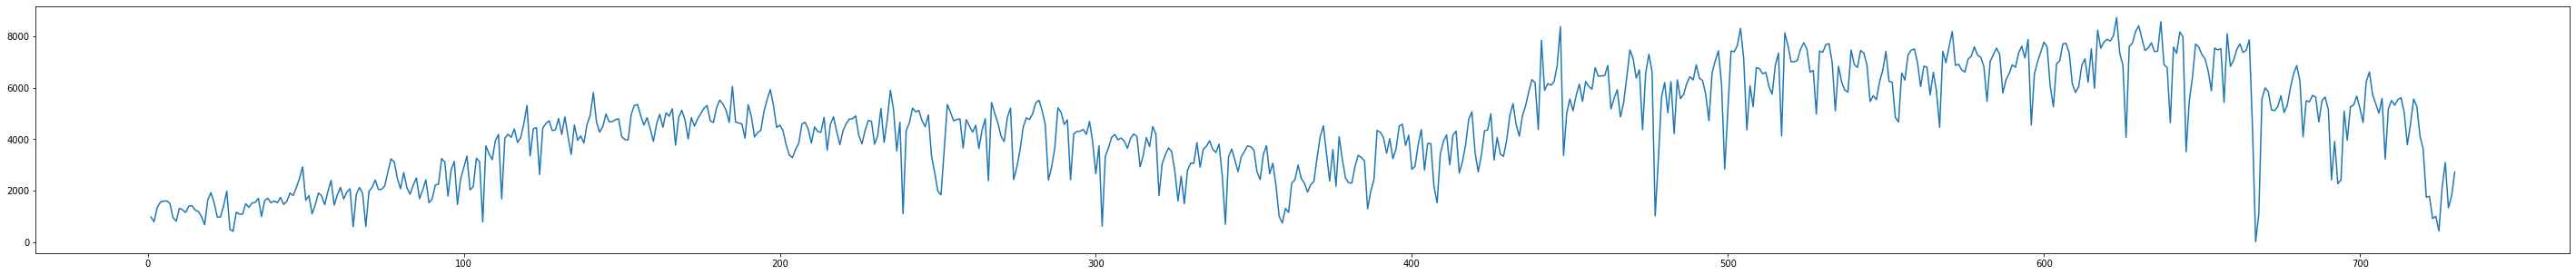

In [40]:
plt.figure(figsize=[50, 5])
plt.plot(df.instant,df.cnt)
plt.show()

A drop in ride is observed near the end of 2019, Map be due to pandemic and restrictions imposed by the local administartion.

In [41]:
df.tail()

,instant,dteday,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,winter,Clear,Light Snow + Rain,Mist + Cloudy
725,726,2019-12-27,1,12,5,1,10.420847,65.2917,23.458911,2114,0,1,0,0,0,0,1
726,727,2019-12-28,1,12,6,0,10.386653,59.0000,10.416557,3095,0,1,0,0,0,0,1
727,728,2019-12-29,1,12,0,0,10.386653,75.2917,8.333661,1341,0,1,0,0,0,0,1
728,729,2019-12-30,1,12,1,1,10.489153,48.3333,23.500518,1796,0,1,0,0,1,0,0
729,730,2019-12-31,1,12,2,1,8.849153,57.7500,10.374682,2729,0,1,0,0,0,0,1


In [42]:
# dropping date column 
df = df.drop('dteday', axis =1)

In [43]:
df.head()

,instant,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,winter,Clear,Light Snow + Rain,Mist + Cloudy
0,1,0,1,1,1,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,1
1,2,0,1,2,1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,1
2,3,0,1,3,1,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,0
3,4,0,1,4,1,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,0
4,5,0,1,5,1,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,0


Making Pair PLot for numeric variable

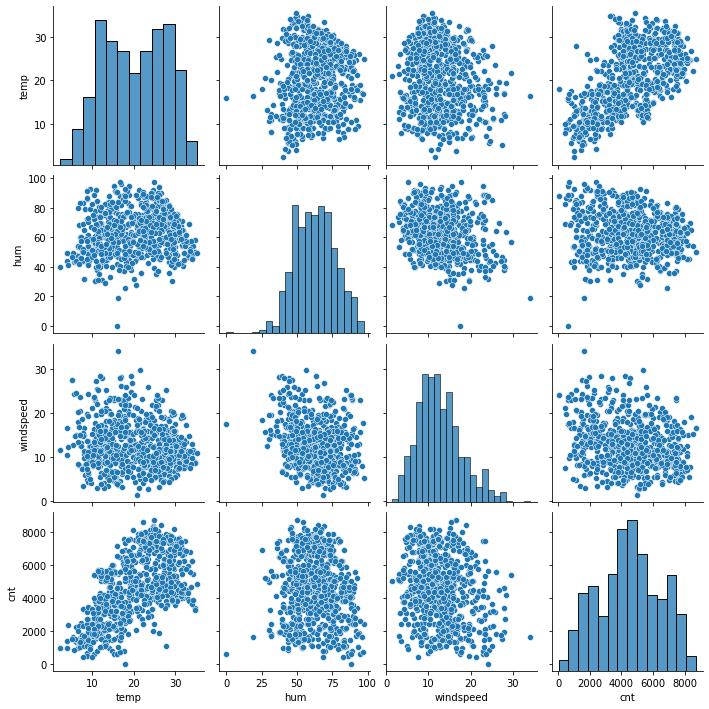

In [44]:
sns.pairplot(df[['temp','hum','windspeed','cnt']])
plt.show()

Good linear relation is observed between ride counts and Temp.

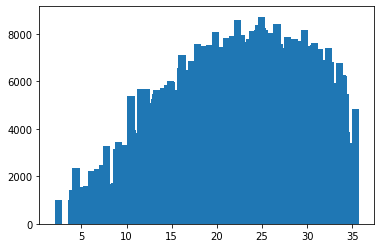

In [45]:
plt.bar(df.temp,df.cnt)
plt.show()

When temp is between 20-30, more rider prefer sharing app.

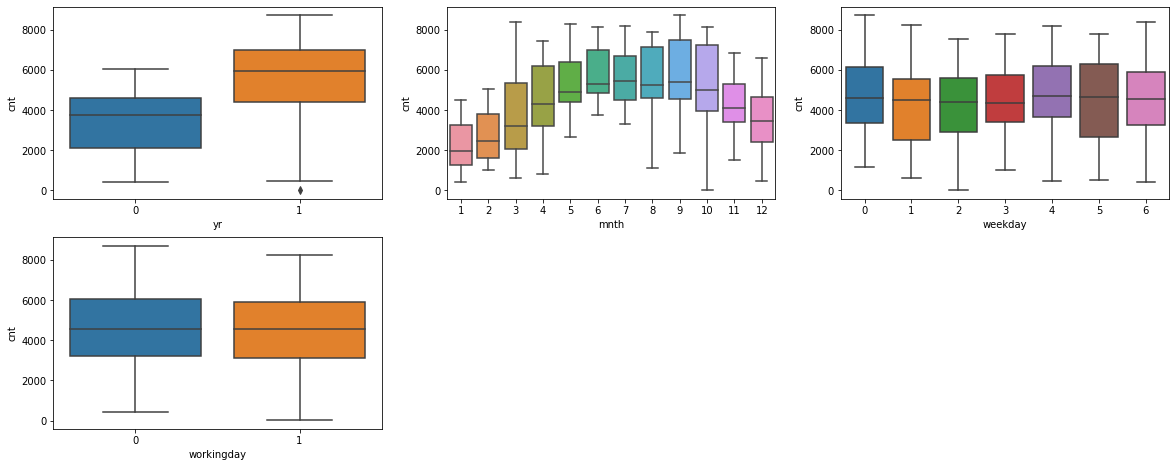

In [46]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)

sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)




# Splitting the Data into Training and Testing Sets

In [47]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Scaling

In [48]:
scaler = MinMaxScaler()

Apply scaling to only numeric variables


In [49]:
num_vars = ['temp',  'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [50]:
df_train.describe()

,instant,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,winter,Clear,Light Snow + Rain,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000
mean,368.941176,0.507843,6.549020,2.950980,0.711765,0.537262,0.650369,0.320768,0.513620,0.262745,0.243137,0.245098,0.24902,0.627451,0.029412,0.343137
std,209.868619,0.500429,3.468714,1.977166,0.453386,0.225844,0.145882,0.169797,0.224593,0.440557,0.429398,0.430568,0.43287,0.483958,0.169124,0.475223
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,3.000000,1.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,7.000000,3.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,553.750000,1.000000,10.000000,5.000000,1.000000,0.735215,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000
max,729.000000,1.000000,12.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [51]:
df_train.head()

,instant,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,winter,Clear,Light Snow + Rain,Mist + Cloudy
653,654,1,10,3,1,0.509887,0.575354,0.300794,0.864243,0,0,0,1,1,0,0
576,577,1,7,3,1,0.815169,0.725633,0.264686,0.827658,1,0,0,0,1,0,0
426,427,1,3,0,0,0.442393,0.640189,0.255342,0.465255,0,1,0,0,0,0,1
728,729,1,12,1,1,0.245101,0.498067,0.663106,0.204096,0,1,0,0,1,0,0
482,483,1,4,0,0,0.395666,0.504508,0.188475,0.482973,0,0,1,0,0,0,1


# Dividing into X and Y sets for the model building

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train

# RFE

In [53]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()


In [54]:
rfe = RFE(lr)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression())

In [55]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 9),
 ('yr', True, 1),
 ('mnth', False, 8),
 ('weekday', False, 7),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('fall', False, 5),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', False, 2),
 ('Clear', True, 1),
 ('Light Snow + Rain', True, 1),
 ('Mist + Cloudy', False, 3)]

Variables as per RFE 

Yr

Temp

Hum

Windspeed

Spring

Clear

LightSnow + Rain

# Running first model (lm1) Temp

In [56]:
# Add a constant
X_train_lm = sm.add_constant(X_train['temp'])

# Create a first fitted model
lm_1 = sm.OLS(y_train, X_train_lm).fit()

In [57]:
# Print a summary of the linear regression model obtained
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           5.80e-61
Time:                        17:19:03   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

# Running second model (lm2) Temp and Fall

In [58]:

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','fall']])

# Create a first fitted model
lm_2 = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           8.59e-62
Time:                        17:19:04   Log-Likelihood:                 179.95
No. Observations:                 510   AIC:                            -353.9
Df Residuals:                     507   BIC:                            -341.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1339      0.022      5.951      0.0

# # Running third model (lm3) Temp,Fall and Clear

In [59]:

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','fall','Clear']])

# Create a first fitted model
lm_3 = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     144.6
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.17e-67
Time:                        17:19:04   Log-Likelihood:                 196.37
No. Observations:                 510   AIC:                            -384.7
Df Residuals:                     506   BIC:                            -367.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0877      0.023      3.780      0.0

# # Running forth model (lm4) Temp,Fall,hum and Clear

In [60]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','fall','Clear','hum']])

# Create a first fitted model
lm_4 = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     110.8
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           9.50e-68
Time:                        17:19:04   Log-Likelihood:                 199.19
No. Observations:                 510   AIC:                            -388.4
Df Residuals:                     505   BIC:                            -367.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1869      0.048      3.912      0.0

# Running fifth model (lm5) Temp,Fall,hum,windspeed and Clear

In [61]:


# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','fall','Clear','hum','windspeed']])

# Create a first fitted model
lm_5 = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.21e-73
Time:                        17:19:04   Log-Likelihood:                 215.47
No. Observations:                 510   AIC:                            -418.9
Df Residuals:                     504   BIC:                            -393.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3560      0.055      6.493      0.0

# Running sixth model (lm6) Temp,Fall,hum,windspeed,winter and Clear

In [62]:


# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','fall','hum','Clear','windspeed','winter']])

# Create a first fitted model
lm_6 = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     94.99
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.63e-79
Time:                        17:19:04   Log-Likelihood:                 231.69
No. Observations:                 510   AIC:                            -449.4
Df Residuals:                     503   BIC:                            -419.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3541      0.053      6.660      0.0

# Running seventh model (lm7) Temp,Fall,hum,windspeed,winter,yr,spring,LightSNow + Rain and Clear

In [63]:



# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','fall','hum','Light Snow + Rain','windspeed','winter','yr','Clear','spring']])

# Create a first fitted model
lm_7 = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.3
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          5.20e-182
Time:                        17:19:04   Log-Likelihood:                 480.83
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     500   BIC:                            -899.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2815      0.03

# Running eighth model (lm8) 'temp','windspeed','yr','spring','Light Snow + Rain','Mist + Cloudy'

In [64]:


# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','windspeed','yr','spring','Light Snow + Rain','Mist + Cloudy']])

# Create a first fitted model
lm_8 = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     362.5
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          4.81e-179
Time:                        17:19:04   Log-Likelihood:                 464.91
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     503   BIC:                            -886.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3204      0.01

# Checking VIF

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X8 = X_train[['temp','windspeed','yr','spring','Light Snow + Rain','Mist + Cloudy']]
vif = pd.DataFrame()
vif['Features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.68
0,temp,3.52
2,yr,2.02
3,spring,1.51
5,Mist + Cloudy,1.45
4,Light Snow + Rain,1.06


# Calculating predicted value

In [66]:
y_train_pre = lm_8.predict(X_train_lm)

Text(0.5, 0, 'Errors')

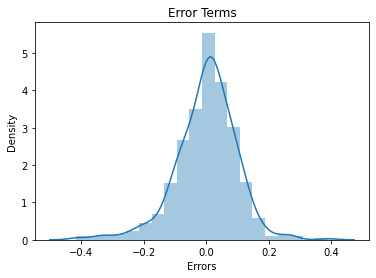

In [67]:
fig = plt.figure()
sns.distplot((y_train - y_train_pre), bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')

In [68]:
y_train.shape

(510,)

# Visualizing the predicted value with actaul

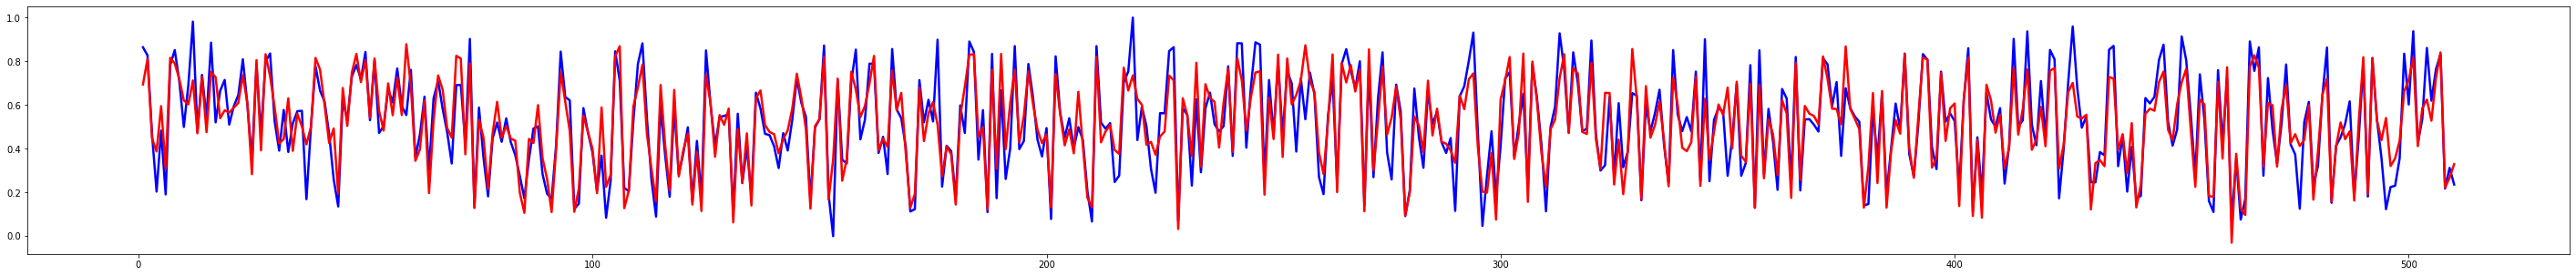

In [69]:
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize=[50, 5])
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pre, color="red",  linewidth=2.5, linestyle="-")

# Error Terms

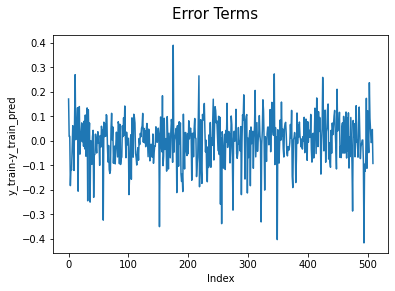

In [70]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pre)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Calculating R2 for train dataset

In [71]:
r2_score(y_train,y_train_pre)

0.8121613464110752

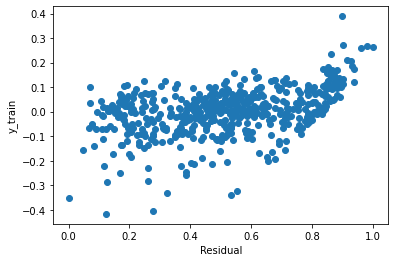

In [72]:
# scatter plot for the check
residual = (y_train - y_train_pre)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

# Predict values for test data set

# Scaling of Test data

In [73]:
num_vars = ['temp',  'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

# Creating X and y data 

In [74]:
y_test = df_test.pop('cnt')
X_test = df_test

In [75]:
y_test.describe()

count    219.000000
mean       0.520592
std        0.218435
min        0.048205
25%        0.377531
50%        0.524275
75%        0.672745
max        0.963300
Name: cnt, dtype: float64

# Adding constant to independent variables

In [76]:
#Predict the values for test data
X_test_lm = sm.add_constant(X_test[['temp','windspeed','yr','spring','Light Snow + Rain','Mist + Cloudy']])
y_test_pred = lm_8.predict(X_test_lm)

# Checking R2 for Test data

In [77]:
r2_score(y_test,y_test_pred)

0.7922034556420758

In [78]:
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)  

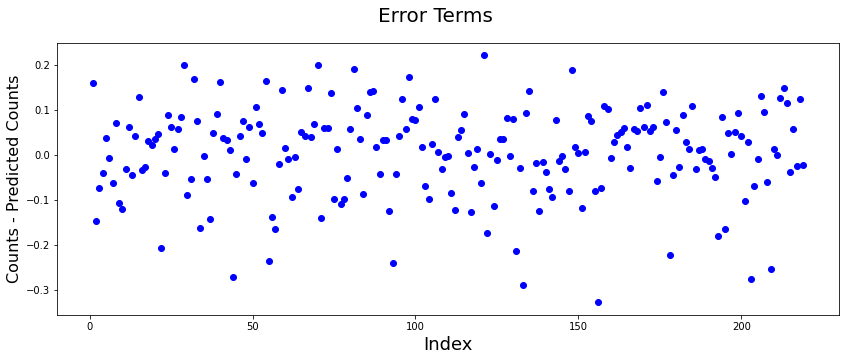

In [79]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

# Conclusion

Significant variables of the model are

1.temp

2.windspeed

3.yr

4.spring

5.Light Snow + Rain

6.Mist + Cloudy


The company should plan to promote the business when temperature is between 20-30 DegC and should ensure that all the bikes are in working condition.

The maintenance of the bike should be done during season when its rain or snowfall happens.

The demand will we high during May to October and slight higher demand on SUnday.

Considering the data from 2019, a robust demand is expected for the sharing bike service.

